In [1]:
import pandas as pd
import numpy as np
from FCM import fcm
from FuzzySilhouette import find_best_cluster_count

In [3]:
df = pd.read_csv('MIEM_vectors.csv')
df.head()

,number,title,type,processed,concat,vec
0,1.0,Изучение транспорта заряженных коллоидных част...,НИР,изучение транспорт заряжать коллоидный частица...,изучение транспорт заряжать коллоидный частица...,"[-0.0070869713090360165, -0.013778778724372387..."
1,2.0,Изучение конвекции Марангони и транспорта колл...,НИР,изучение конвекция марангонь транспорт коллоид...,изучение конвекция марангонь транспорт коллоид...,"[-0.010782599449157715, -0.022596212103962898,..."
2,3.0,Разработка программного комплекса решения эндш...,НИР,разработка программный комплекс решение эндшпи...,разработка программный комплекс решение эндшпи...,"[-0.005868301726877689, -0.01714327372610569, ..."
3,4.0,Программа объединения точек платежей для проти...,Прогр.,программа объединение точка платеж противодейс...,программа объединение точка платеж противодейс...,"[-0.00847938284277916, -0.006686461623758078, ..."
4,5.0,Антифрод (antifraud),Прогр.,антифрод antifraud,антифрод antifraud Прогр.,"[-0.008986253291368484, 0.002366742817685008, ..."


In [4]:
def convert_to_array(vec):
    vec = vec.replace('[', '')
    vec = vec.replace(']', '')
    vec = vec.replace("'", '')
    vec = vec.split(', ')
    vec = [float(i) for i in vec]
    return np.array(vec)

In [5]:
from tqdm import tqdm

tqdm.pandas()
df['vec'] = df['vec'].progress_apply(convert_to_array)

100%|██████████| 253/253 [00:00<00:00, 18207.94it/s]


### Проверим для 3-х кластеров

In [6]:
X = np.array(df.vec.values.tolist())

In [7]:
cntr, U = fcm(X, 3)

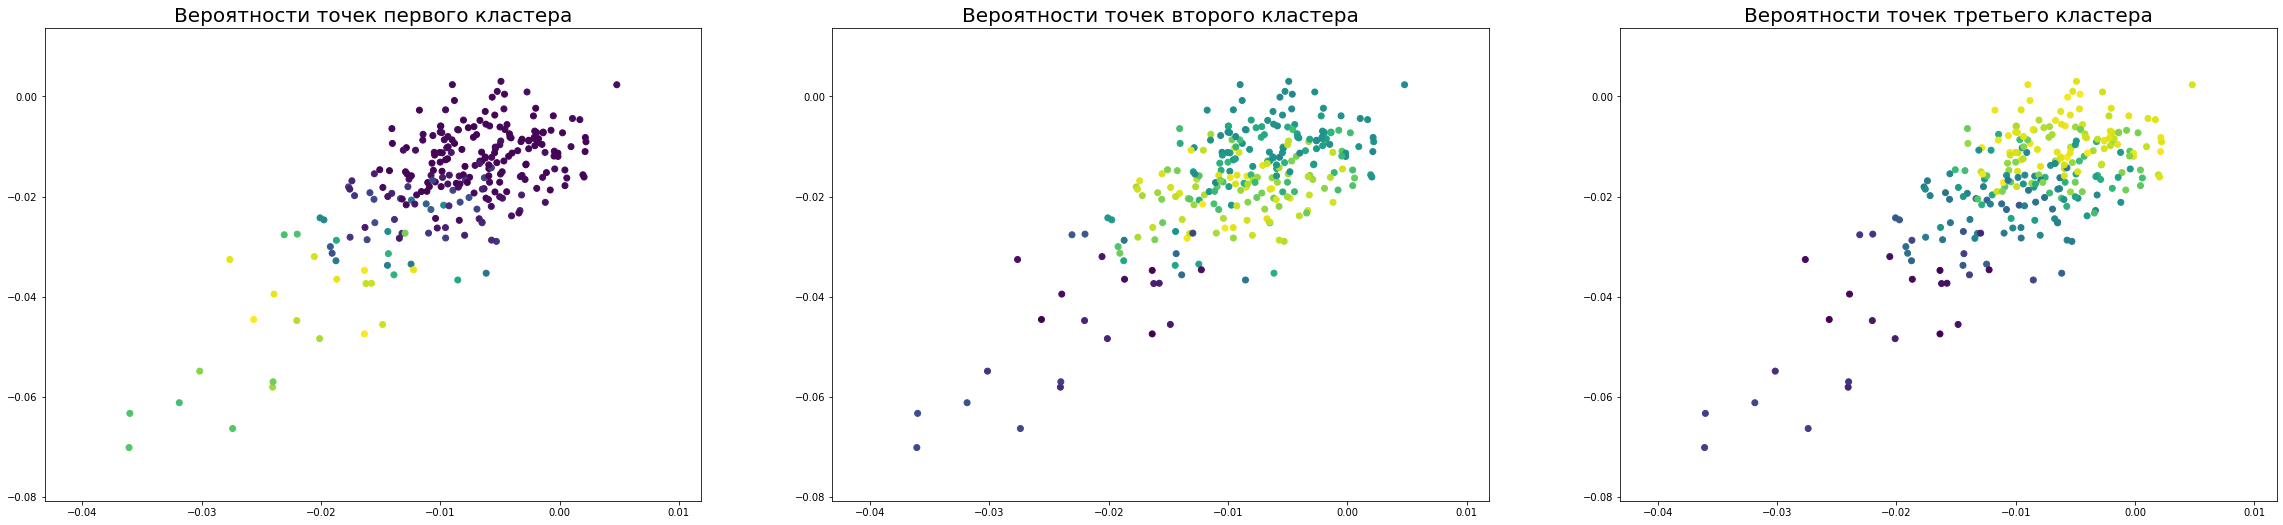

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
plt.subplot(431)
plt.gca().set_title('Вероятности точек первого кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=U[0,:])
plt.subplot(432)
plt.gca().set_title('Вероятности точек второго кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=U[1,:])
plt.subplot(433)
plt.gca().set_title('Вероятности точек третьего кластера', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=U[2,:])

### Подбираем оптимальное число кластеров

In [10]:
clusters_count, score, scores = find_best_cluster_count(X, 12, cmeams)

In [11]:
print('best count:', clusters_count)
print('best score:', score)

best count: 4
best score: 0.570921


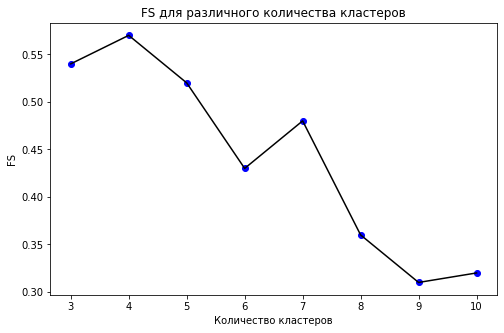

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(3, 11), scores, 'bo', np.arange(3, 11), scores, 'k')
plt.title('FS для различного количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('FS')
plt.show()

In [13]:
cntr, U = fcm(X, 4)

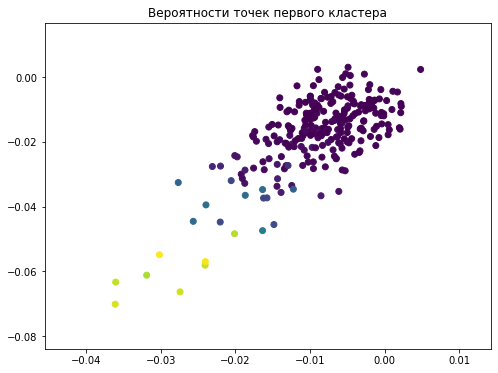

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Вероятности точек первого кластера')
plt.scatter(X[:, 0], X[:, 1], c=U[0,:])